In [33]:
def heatmap(state, month):
    
    # Import required libraries
    import geopandas as gpd
    import matplotlib.pyplot as plt
    import pandas as pd
    from sklearn import preprocessing
    import numpy as np
    
    # Define shapefile object
    SHAPEFILE = "tl_2021_us_state.shp"
    
    # Read shapefile to new geopandas object
    geo_df =  gpd.read_file(SHAPEFILE)
    
    # Drop states that are not part of continental US
    geo_df = geo_df.drop(geo_df.loc[geo_df['STUSPS'] == "AK"].index)
    geo_df = geo_df.drop(geo_df.loc[geo_df['STUSPS'] == "HI"].index)
    geo_df = geo_df.drop(geo_df.loc[geo_df['STUSPS'] == "PR"].index)
    
    # Read claim volume file
    states_df = pd.read_csv("states.csv") 
    
    # Convert date to datetime
    states_df.date = pd.to_datetime(states_df.date)
    
    # Filter DataFrame by month and groupby state with total sum of Claim Volume
    
    m_states_df = states_df[states_df.date.dt.month == month]
    m_states_df = m_states_df.groupby('state').sum()
    
    
    # Reshape Claim Volume to to fit 2DArray reqs for normalize function
    d = m_states_df['claim_volume'].values.reshape(-1,1)
    
    
    try:
        
        # Normalize Claim Volume and append new column to DataFrame
        b = preprocessing.normalize(d, axis=0)
        scaled_df = m_states_df
        scaled_df['scaled'] = b
        
        # Merge Shapefile and Claim Volume Data Frames
        merged_df = pd.merge(left=geo_df, right=scaled_df, how='left', left_on='STUSPS', right_on='state')
     

        # Use Conditionals to Filter merged DataFrame by State or Cont. US
        if state.upper() in merged_df.values:
            merged_df = merged_df[merged_df.STUSPS == state.upper()]  
        elif state == "US" or "us":
            assert True
        else:
            print("Please enter an abbreviated state within the Continental U.S.")
            return
            
        # Create Heatmap
        title = 'Monthly Claim Volume - '+ str(month) + '/2021'
        col = 'scaled'

        vmin = merged_df[col].min()
        vmax = merged_df[col].max()
        cmap = 'viridis'

        # Create figure and axes for Matplotlib
        fig, ax = plt.subplots(1, figsize=(20, 8))

        # Remove the axis
        ax.axis('off')
        merged_df.plot(column=col, ax=ax, edgecolor='0.8', linewidth=1, cmap=cmap)

        # Add a title
        ax.set_title(title, fontdict={'fontsize': '25', 'fontweight': '3'})

        # Create colorbar as a legend
        sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap=cmap)

        # Empty array for the data range
        sm._A = []

        # Add the colorbar to the figure
        cbaxes = fig.add_axes([0.15, 0.25, 0.01, 0.4])
        cbar = fig.colorbar(sm, cax=cbaxes)
        
    except ValueError:
        print ("The number must be a month from 1-12.")
        

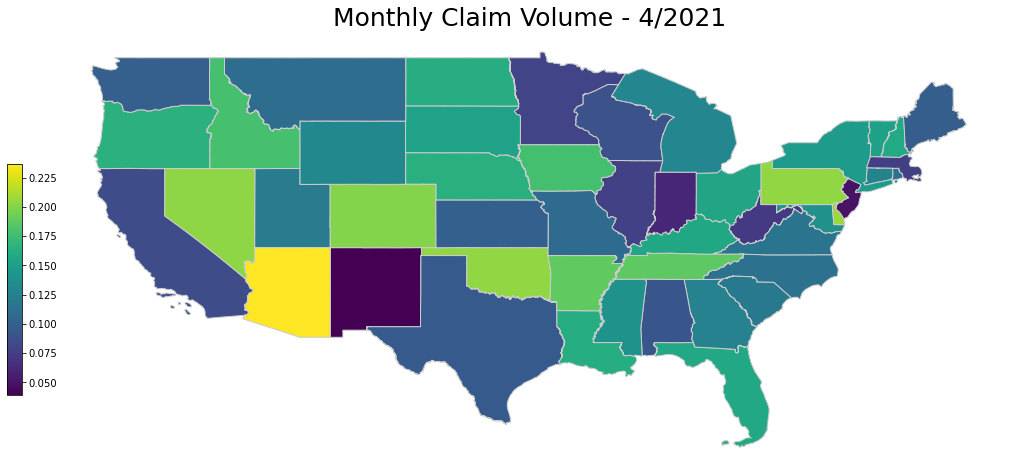

In [37]:
# Please enter an abbreviated state within the Contintenal US or enter "US" for entire country.
# Please enter the corresponding value for month desired from 1-12
heatmap('US', 4)